In [59]:
from google.colab import files
uploaded=files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [60]:
import pandas as pd
df=pd.read_csv("UCI_Credit_Card.csv")

In [61]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [62]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [63]:
df['default.payment.next.month']

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [64]:
df['default_amount']=(df['default.payment.next.month']==1)*(df['LIMIT_BAL'])

In [65]:

x=df.drop(['default.payment.next.month', 'default_amount'], axis=1)
y=df['default.payment.next.month']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42, stratify=y)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score
pred=model.predict(x_test_scaled)
y_proba=model.predict_proba(x_test_scaled)[:,1]

print("confusion matrix is \n", confusion_matrix(y_test,pred))
print("classification report is \n",classification_report(y_test,pred))
print("accuracy score is \n",accuracy_score(y_test,pred))
print("roc auc score is \n",roc_auc_score(y_test,y_proba))

confusion matrix is 
 [[6815  194]
 [1528  463]]
classification report is 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.23      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

accuracy score is 
 0.8086666666666666
roc auc score is 
 0.7142606130497784


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

y_pred_rf = rf_classifier.predict(x_test_scaled)
y_proba_rf = rf_classifier.predict_proba(x_test_scaled)[:, 1]  # ✅ for expected loss on full dataset

# Evaluation using test predictions
print("confusion matrix is \n", confusion_matrix(y_test, pred1))
print("classification report is \n", classification_report(y_test, pred1))
print("accuracy score is \n", accuracy_score(y_test, pred1))
print("roc auc score is \n", roc_auc_score(y_test, y_proba1))  # ✅ use y_proba1 here


confusion matrix is 
 [[6678  331]
 [1334  657]]
classification report is 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.66      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.81      0.79      9000

accuracy score is 
 0.815
roc auc score is 
 0.7625941433268084


In [72]:
df_defaulters=df[df['default.payment.next.month']==1]

x_reg=df_defaulters.drop(['default.payment.next.month', 'default_amount'], axis=1)
y_reg=df_defaulters['default_amount']

In [73]:
from sklearn.model_selection import train_test_split
xr_train,xr_test,yr_train,yr_test=train_test_split(x_reg,y_reg,test_size=0.3,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler

scale_r = StandardScaler()

xr_train_scaled = scale.fit_transform(xr_train)  # This is fine
xr_test_scaled = scale.transform(xr_test)           # Only transform on test data


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_model = LinearRegression()
reg_model.fit(xr_train_scaled, yr_train)

# Predict
yr_pred = reg_model.predict(xr_test_scaled)

# Evaluate
rmse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.00
R² Score: 1.0000


In [79]:
# Step 1: Scale the full feature set for classification
x_all = df.drop(['default.payment.next.month', 'default_amount'], axis=1)
x_all_scaled = scaler.transform(x_all)  # use classifier scaler

# Step 2: Predict probability of default using classifier
p_default = rf_classifier.predict_proba(x_all_scaled)[:, 1]  # P(default) from Random Forest

# Step 3: Predict default amount using regressor
# We'll create a mask for defaulters
default_mask = df['default.payment.next.month'] == 1

# Scale features for defaulters (use regression scaler)
x_reg_all = x_all[default_mask]
x_reg_all_scaled = scale_r.fit_transform(x_reg_all)

# Predict default amount
predicted_default_amount = reg_model.predict(x_reg_all_scaled)

# Create full array of default amounts (0 for non-defaulters)
default_amount_pred_full = [0] * len(df)
j = 0
for i in range(len(df)):
    if default_mask.iloc[i]:
        default_amount_pred_full[i] = predicted_default_amount[j]
        j += 1


In [80]:
# Now calculate expected loss
expected_loss = p_default * default_amount_pred_full

# Add to dataframe for inspection
df['predicted_default_amount'] = default_amount_pred_full
df['p_default'] = p_default
df['expected_loss'] = expected_loss


In [81]:
# Sort customers by highest expected loss
df_sorted = df.sort_values(by='expected_loss', ascending=False)

# View top 10 risky customers
df_sorted[['LIMIT_BAL', 'p_default', 'predicted_default_amount', 'expected_loss']].head(10)


,LIMIT_BAL,p_default,predicted_default_amount,expected_loss
26921,720000.0,0.67,708702.126365,474830.424665
527,620000.0,0.73,610411.478708,445600.379457
13510,500000.0,0.90,492462.701519,443216.431367
23377,550000.0,0.81,541608.025348,438702.500531
27440,500000.0,0.89,492462.701519,438291.804352
13883,740000.0,0.60,728360.255897,437016.153538
5193,500000.0,0.88,492462.701519,433367.177336
15585,500000.0,0.88,492462.701519,433367.177336
27467,550000.0,0.80,541608.025348,433286.420278
451,600000.0,0.73,590753.349176,431249.944899


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

/tmp/ipython-input-83-1079564889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20['expected_loss'], y=top20.index, palette="rocket")


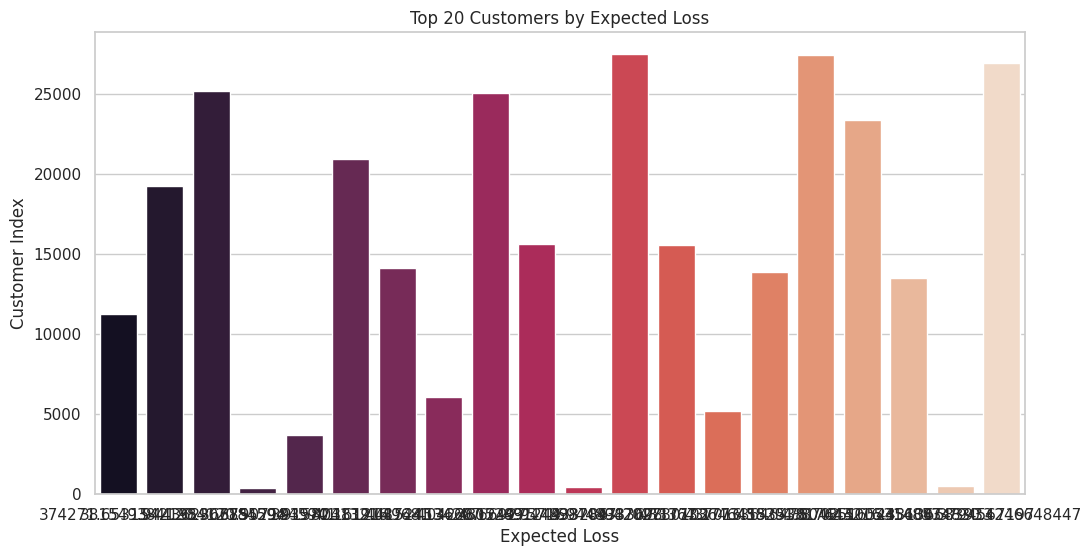

In [83]:
top20 = df.sort_values(by='expected_loss', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top20['expected_loss'], y=top20.index, palette="rocket")
plt.xlabel("Expected Loss")
plt.ylabel("Customer Index")
plt.title("Top 20 Customers by Expected Loss")
plt.show()


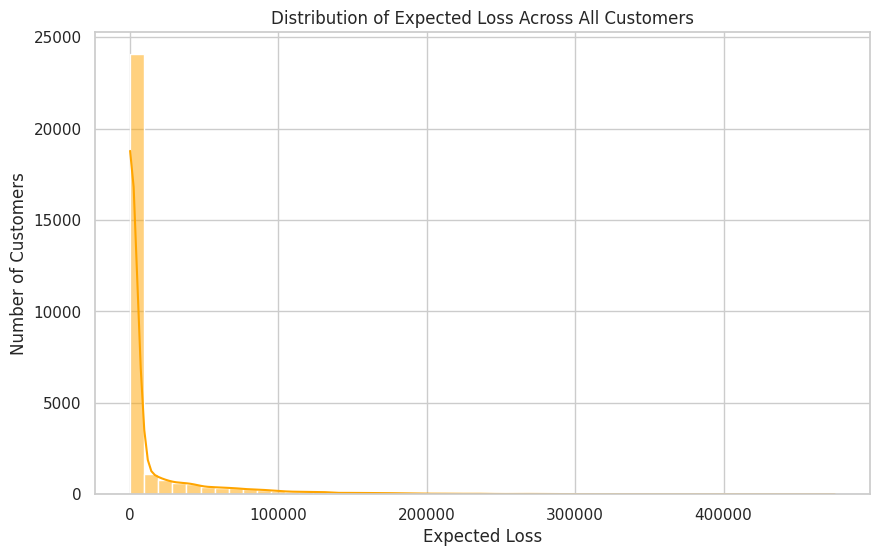

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['expected_loss'], bins=50, kde=True, color='orange')
plt.title("Distribution of Expected Loss Across All Customers")
plt.xlabel("Expected Loss")
plt.ylabel("Number of Customers")
plt.show()


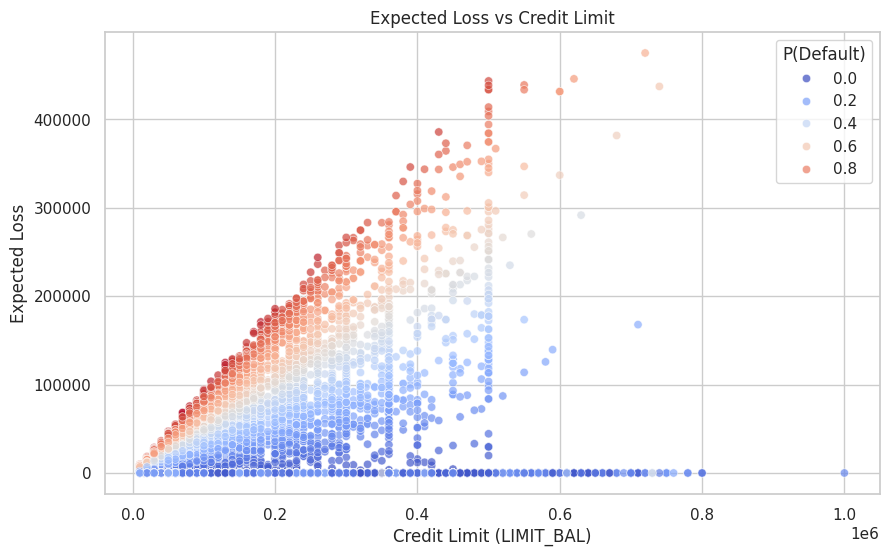

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['LIMIT_BAL'], y=df['expected_loss'], hue=df['p_default'], palette='coolwarm', alpha=0.7)
plt.title("Expected Loss vs Credit Limit")
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Expected Loss")
plt.legend(title="P(Default)")
plt.show()
